In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("final_forex_dataset.csv")

In [3]:
data.head()

,Year,Month,Export_Quantity_(Kg),Export_Price_(Rs.),High_Grown_Quantity_(Kg),Medium_Grown_Quantity_(Kg),Low_Grown_Quantity_(Kg),Avg_Exchange_Rate,FEE_(USD)
0,2012,3,27702254.0,536.71,6385525.09,4625138.9,17929328.00,200.0000,7.434038e+07
1,2012,4,23290994.0,540.91,7323011.00,5748401.2,16982493.50,200.0000,6.299166e+07
2,2012,5,30004885.0,567.32,8726319.70,5898297.1,18086627.25,200.0000,8.511186e+07
3,2012,6,22804265.0,553.03,5963710.45,3842289.7,16737376.00,130.3009,9.678707e+07
4,2012,7,25761299.0,555.55,4064094.35,3429525.6,17506502.00,200.0000,7.155845e+07


In [4]:
# Step 1: Prepare the data
X = data.drop(columns=['FEE_(USD)'])  # Features
y = data['FEE_(USD)']  # Target variable

# Convert DataFrame to NumPy for ARIMA compatibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train.shape, X_test.shape

((113, 8), (29, 8))

In [6]:
def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(str(model) + ' --> ' + str(acc))

In [7]:
lr = LinearRegression()
model_acc(lr)

rf = RandomForestRegressor()
model_acc(rf)

dt = DecisionTreeRegressor()
model_acc(dt)

LinearRegression() --> 0.9606676644869463
RandomForestRegressor() --> 0.7283025203449607
DecisionTreeRegressor() --> 0.80955873473968


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        142 non-null    int64  
 1   Month                       142 non-null    int64  
 2   Export_Quantity_(Kg)        142 non-null    float64
 3   Export_Price_(Rs.)          142 non-null    float64
 4   High_Grown_Quantity_(Kg)    142 non-null    float64
 5   Medium_Grown_Quantity_(Kg)  142 non-null    float64
 6   Low_Grown_Quantity_(Kg)     142 non-null    float64
 7   Avg_Exchange_Rate           142 non-null    float64
 8   FEE_(USD)                   142 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 10.1 KB


In [9]:
model = LinearRegression()
model = model.fit(X_train, y_train)

In [10]:
acc = model.score(X_test, y_test)
print(acc)

0.9606676644869463


In [11]:
import pickle
with open('forex_model.pickle', 'wb') as file:
    pickle.dump(model, file)

In [12]:
X_train.columns

Index(['Year', 'Month', 'Export_Quantity_(Kg)', 'Export_Price_(Rs.)',
       'High_Grown_Quantity_(Kg)', 'Medium_Grown_Quantity_(Kg)',
       'Low_Grown_Quantity_(Kg)', 'Avg_Exchange_Rate'],
      dtype='object')

In [13]:
model.predict([[2025, 12, 25502254.0, 500, 8726319.70, 3842289.7, 17506502.00, 290]])

C:\Users\hasit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([33939159.66960168])

In [14]:
import matplotlib.pyplot as plt

In [15]:
sample_data = [
    [2025, 1, 25502254.0, 500, 8726319.70, 3842289.7, 17506502.00, 290],
    [2025, 2, 24000000.0, 490, 8500000.0, 3700000.0, 17000000.00, 285],
    [2025, 3, 23000000.0, 480, 8300000.0, 3600000.0, 16500000.00, 280],
    [2025, 4, 22000000.0, 470, 8200000.0, 3500000.0, 16000000.00, 275],
    [2025, 5, 21000000.0, 460, 8100000.0, 3400000.0, 15500000.00, 270],
]

sample_data = np.array(sample_data)

predictions = model.predict(sample_data)

months = sample_data[:, 1]

C:\Users\hasit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


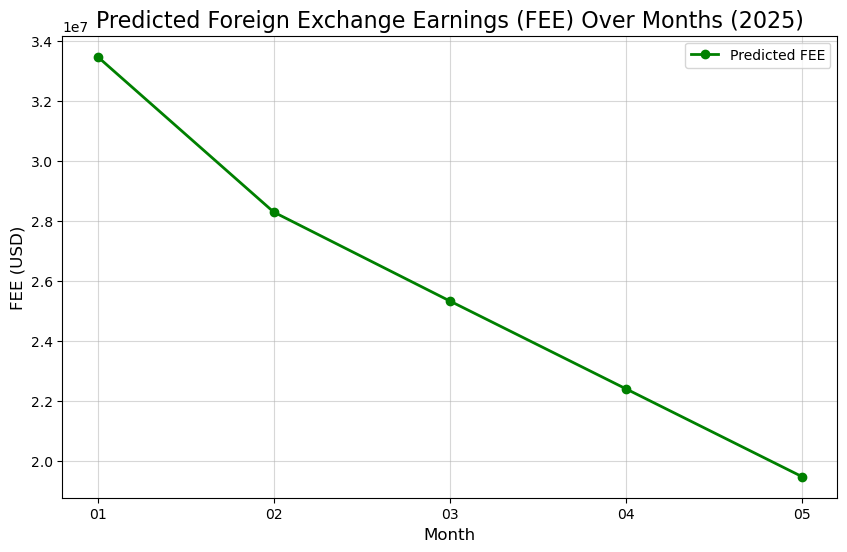

In [16]:
# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(months, predictions, marker='o', label='Predicted FEE', color='green', linewidth=2)
plt.title('Predicted Foreign Exchange Earnings (FEE) Over Months (2025)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('FEE (USD)', fontsize=12)
plt.xticks(ticks=months, labels=[f'{int(m):02d}' for m in months])  # Format months as MM
plt.grid(alpha=0.5)
plt.legend()
plt.show()